In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os 

import torch
torch.manual_seed(0)

import numpy as np 
np.random.seed(0)

## Task 2: Create Models

In [3]:
from models import *

In [4]:
# Since we're only using MNIST and Fashion MNIST, we can hardcode the following parameters.
n_channels = 1 
img_dim = 28 
n_classes = 10 

Our first model, PaperCNN, is the CNN model used in the paper. 

In [5]:
model = PaperCNN(n_channels, n_classes)
print(model)

PaperCNN(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear): Sequential(
    (0): Linear(in_features=800, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=10, bias=True)
  )
)


Our second model, Alexish, is a CNN loosely based on AlexNet.

In [6]:
model = Alexish(n_channels, n_classes)
print(model)

Alexish(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear): Sequential(
    (0): Linear(in_features=6272, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Task 3: Training Models 

In [7]:
from train import train_main

We have two models (PaperCNN and Alexish) and two datasets (MNIST and FashionMNIST). Let's begin by training both models on both datasets. The resulting model checkpoints are stored in ```{outdir}/model_ckpts/{model_name}_{dataset}.pt```

In [8]:
outdir='./'

for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        train_main(outdir=outdir, dataset_name=dataset_name, model_name=model_name, batch_size=32, epochs=10)

**************************************************
Training PaperCNN on mnist
**************************************************
Epoch 1/10 | Loss: 0.12739376723766327
Saved best model, current test acc is 98.83%
Epoch 2/10 | Loss: 0.039830517023801804
Epoch 3/10 | Loss: 0.02833154983818531
Saved best model, current test acc is 99.22%
Epoch 4/10 | Loss: 0.020231209695339203
Epoch 5/10 | Loss: 0.017520388588309288
Epoch 6/10 | Loss: 0.012482600286602974
Epoch 7/10 | Loss: 0.010543258860707283
Epoch 8/10 | Loss: 0.010160045698285103
Epoch 9/10 | Loss: 0.0068886131048202515
Epoch 10/10 | Loss: 0.007560301572084427
**************************************************
Training PaperCNN on fashion_mnist
**************************************************
Epoch 1/10 | Loss: 0.4546342194080353
Saved best model, current test acc is 85.92%
Epoch 2/10 | Loss: 0.2958022356033325
Saved best model, current test acc is 88.9%
Epoch 3/10 | Loss: 0.25316694378852844
Saved best model, current test acc is 89

## Task 4: Classification Images (aka Average Noise Maps)

In [2]:
from classification_image import *

We begin by calculating the average noise maps for each model. For each model, there is an average noise map for each class of the dataset. We also visualize those average noise maps, determine what the model classifies them as, and use the noise maps as a classifier. 

#### Notes: 

- There may be some noise maps that are all zeros (completely purple). This occurs when none of the noise images from the trials are classified as that particular class. We then assign noise maps of zero to that class to avoid classification issues down the line with nans. Running more trials can solve this issue but requires a longer runtime. 
- The cell values shown in the confusion matrices are class accuracies (i.e. normalized across rows)

********************************************************************************
Calculating classification images for PaperCNN trained on mnist
********************************************************************************


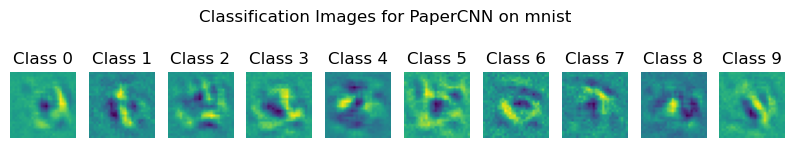

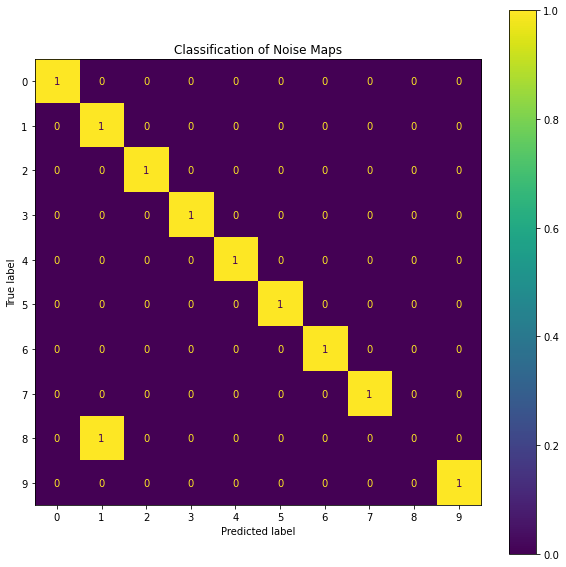



Using average noise maps as classifiers


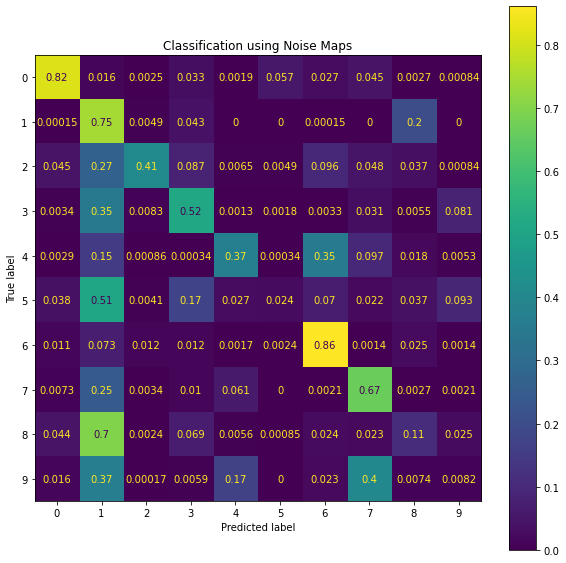

********************************************************************************
Calculating classification images for PaperCNN trained on fashion_mnist
********************************************************************************


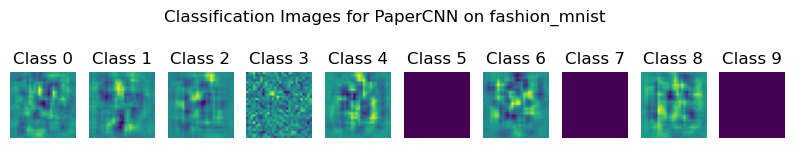

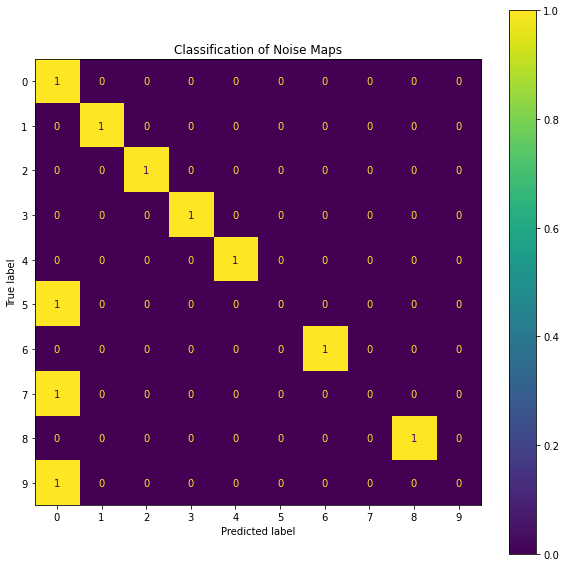



Using average noise maps as classifiers


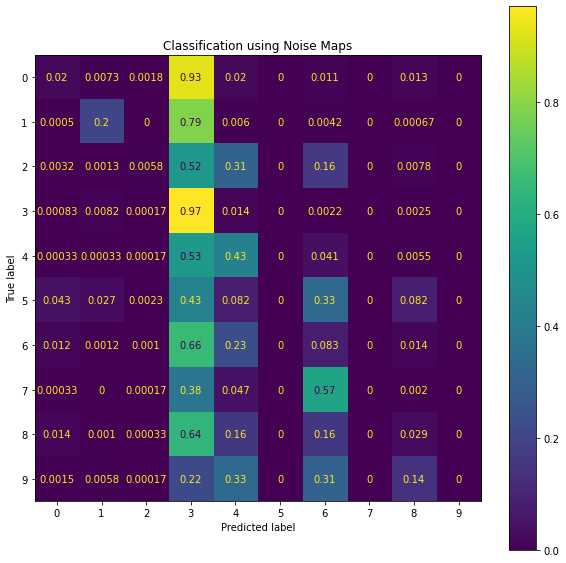

********************************************************************************
Calculating classification images for Alexish trained on mnist
********************************************************************************


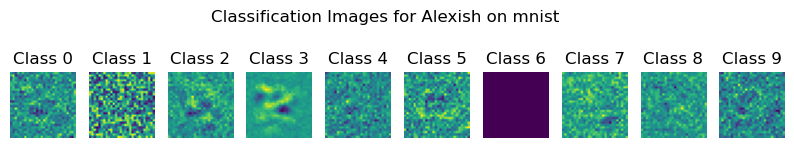

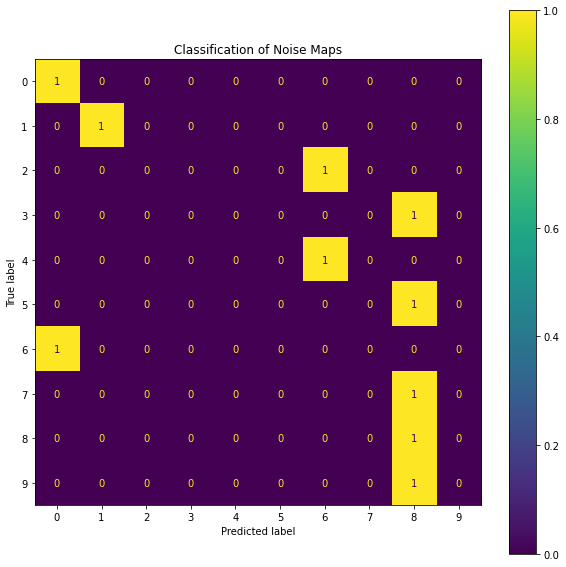



Using average noise maps as classifiers


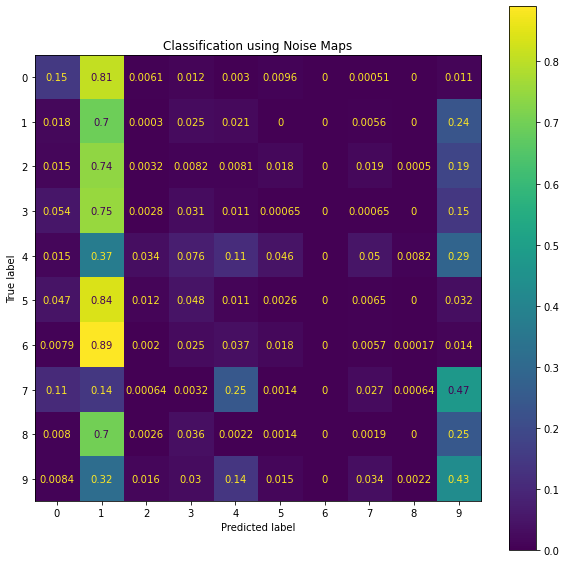

********************************************************************************
Calculating classification images for Alexish trained on fashion_mnist
********************************************************************************


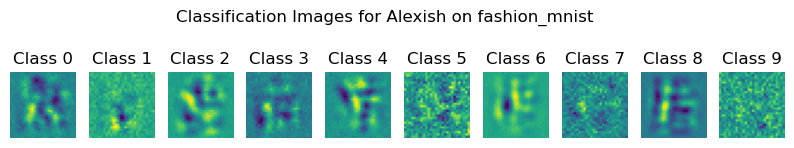

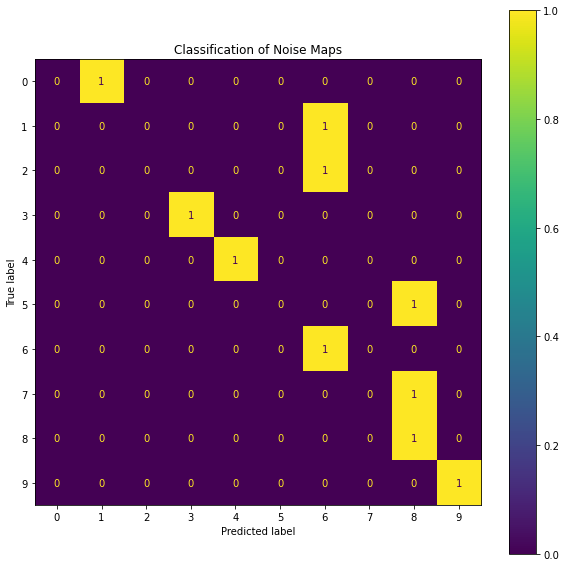



Using average noise maps as classifiers


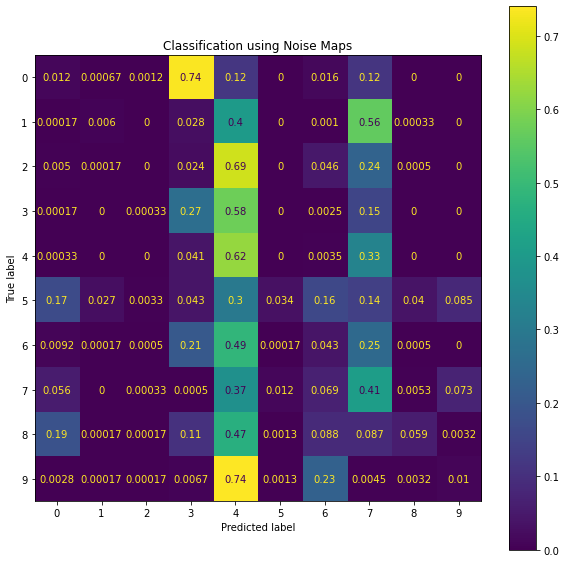

In [5]:
outdir = './'

# Path where model checkpoints are stored 
ckpt_path = os.path.join(outdir, 'model_ckpts')

# Noise maps 
for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        ClassificationImgMain(ckpt_path, model_name, dataset_name, num_trials=1000000)
        

## Task 5: Spike Triggered Analysis (but actually mean layer activation maps)

In [5]:
from activation_maps import ActivationMapsMain
import utils 

For this task, we will calculate and visualize the mean layer activation map for the first and last conv layers of each model. 

First, let's calculate the activation maps on real data. 

In [6]:
# Define where model checkpoints are stored
outdir = './'
ckpt_path = os.path.join(outdir, 'model_ckpts') 

********************************************************************************
Calculating average activation maps for mnist PaperCNN using real data
********************************************************************************
First Conv


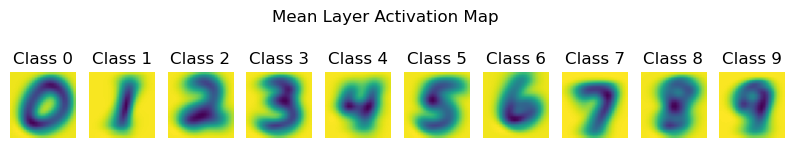

Last Conv


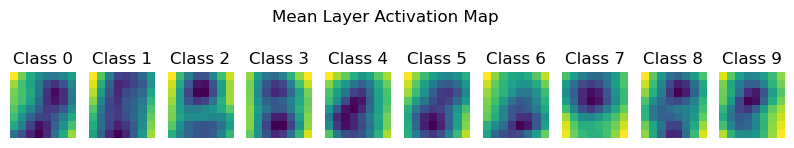

********************************************************************************
Calculating average activation maps for fashion_mnist PaperCNN using real data
********************************************************************************
First Conv


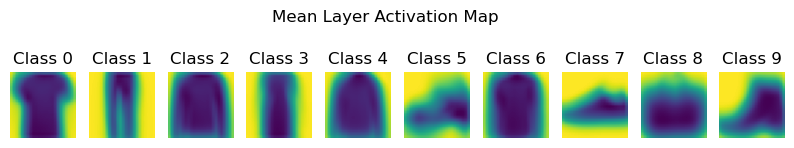

Last Conv


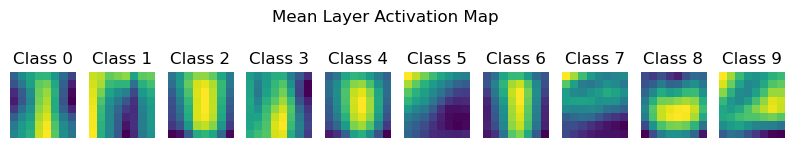

********************************************************************************
Calculating average activation maps for mnist Alexish using real data
********************************************************************************
First Conv


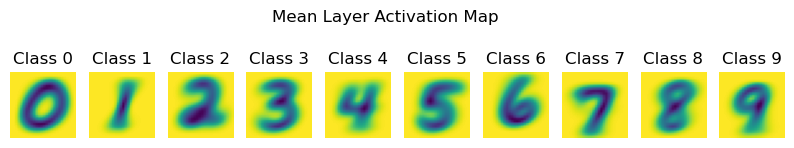

Last Conv


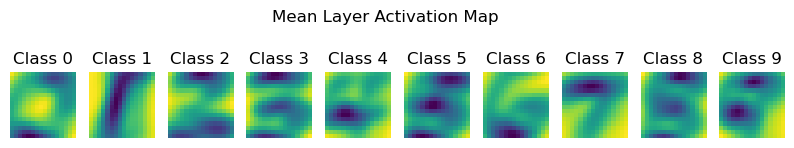

********************************************************************************
Calculating average activation maps for fashion_mnist Alexish using real data
********************************************************************************
First Conv


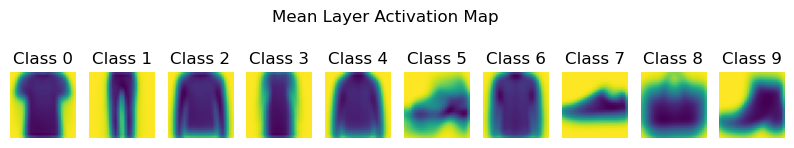

Last Conv


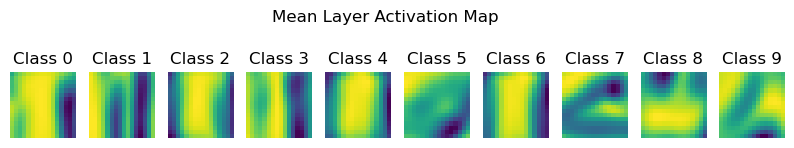

In [13]:
model_real_act_maps = {}
# Mean layer activation maps 
for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        
        # Calculate mean layer activation maps for first and last conv layers 
        act_maps = ActivationMapsMain(ckpt_path, model_name, dataset_name, real_data=True, num_trials=100000)
        model_real_act_maps[model_name+dataset_name] = act_maps

Now, let's calculate the mean layer activation maps on noise data.

#### Note:
- Some activation maps may be missing in the plots. This occurs when none of the noise images in the trial are classified as that particular class, meaning we have no data to calculate on. This can be solved by increasing the number of trials but affects runtime.

********************************************************************************
Calculating average activation maps for mnist PaperCNN using noise data
********************************************************************************
First Conv


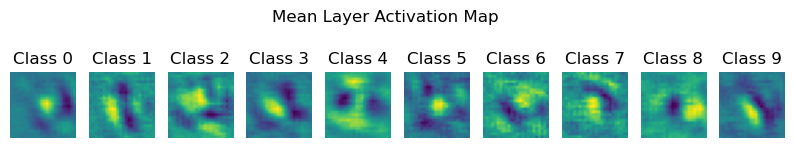

Last Conv


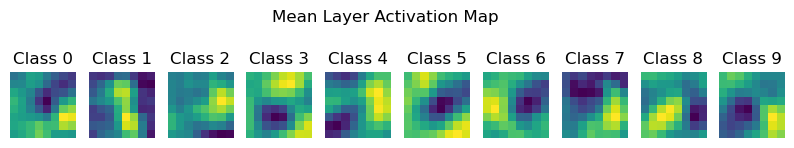

********************************************************************************
Calculating average activation maps for fashion_mnist PaperCNN using noise data
********************************************************************************
First Conv


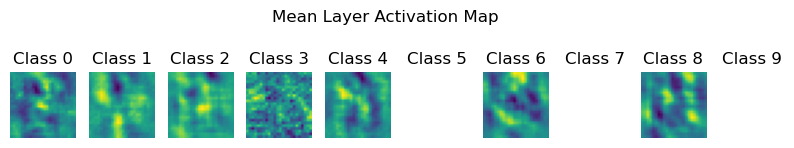

Last Conv


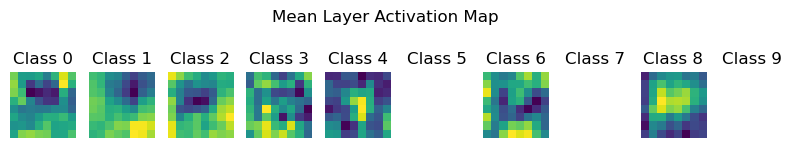

********************************************************************************
Calculating average activation maps for mnist Alexish using noise data
********************************************************************************
First Conv


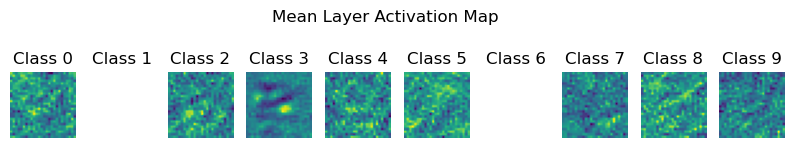

Last Conv


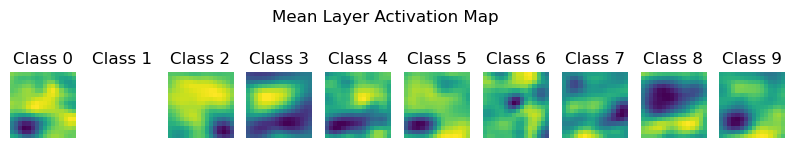

********************************************************************************
Calculating average activation maps for fashion_mnist Alexish using noise data
********************************************************************************
First Conv


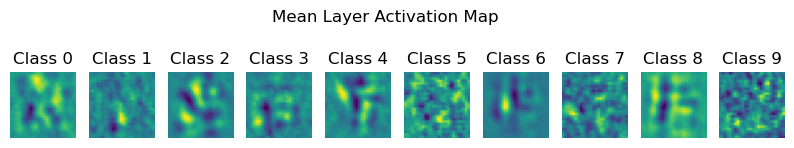

Last Conv


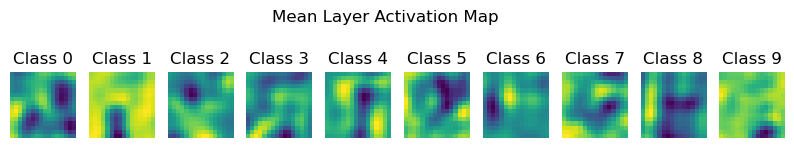

In [7]:
model_noise_act_maps = {}
# Mean layer activation maps 
for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        
        # Calculate mean layer activation maps for first and last conv layers 
        act_maps = ActivationMapsMain(ckpt_path, model_name, dataset_name, real_data=False, num_trials=150000)
        model_noise_act_maps[model_name+dataset_name] = act_maps

## Task 6: Adversarial Bias 

Now that we have the mean layer activation maps, we can adversarially bias the models by adding the last layer's mean activation map computed on noise of one label to a real data sample of a different label. 

In [8]:
from adversarial_bias import AdversarialMain

Let's try this adversarial experiment with two random classes. ```ref_class``` is the class of the original image, while ```bias_class``` is the class of the mean layer activation map we'll add onto the original image. Following the paper's method, we'll use the mean activation map from the last conv layer of the model. 

********************************************************************************
Adversarial experiment using PaperCNN on mnist...
********************************************************************************
Original image for reference class 8, with predicted class 8: 


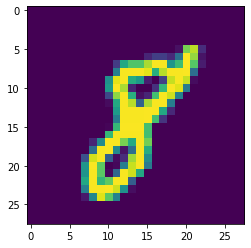

Mean layer activation map of class 4: 


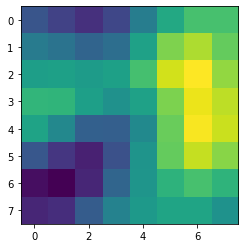

Combined image, with predicted class 8: 


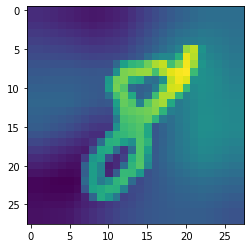

********************************************************************************
Adversarial experiment using PaperCNN on fashion_mnist...
********************************************************************************
Original image for reference class 8, with predicted class 8: 


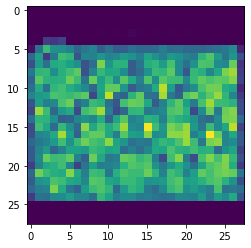

Mean layer activation map of class 4: 


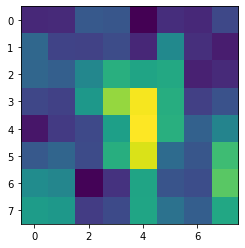

Combined image, with predicted class 8: 


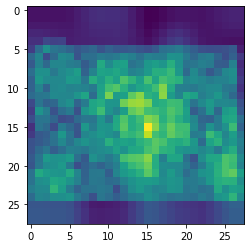

********************************************************************************
Adversarial experiment using Alexish on mnist...
********************************************************************************
Original image for reference class 8, with predicted class 8: 


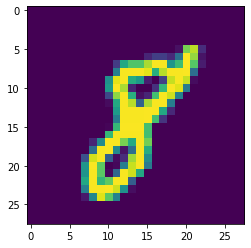

Mean layer activation map of class 4: 


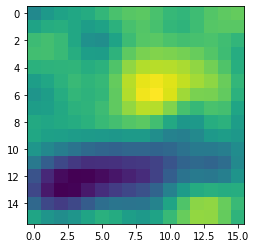

Combined image, with predicted class 8: 


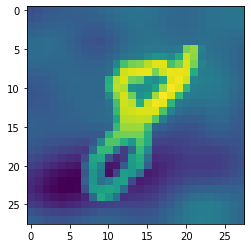

********************************************************************************
Adversarial experiment using Alexish on fashion_mnist...
********************************************************************************
Original image for reference class 8, with predicted class 8: 


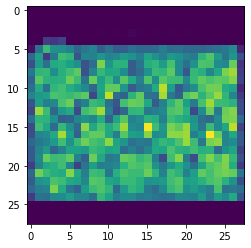

Mean layer activation map of class 4: 


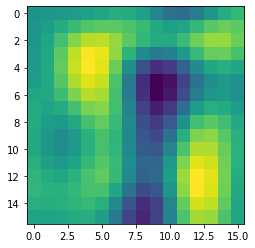

Combined image, with predicted class 8: 


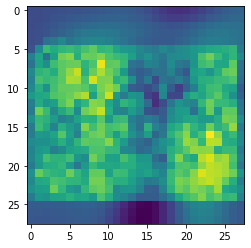

In [9]:
ref_class = 8
bias_class = 4

for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        AdversarialMain(ckpt_path, model_name, dataset_name, ref_class, bias_class, model_noise_act_maps, "Last Conv")

Let's rerun the experiment again with a different set of classes.

********************************************************************************
Adversarial experiment using PaperCNN on mnist...
********************************************************************************
Original image for reference class 2, with predicted class 2: 


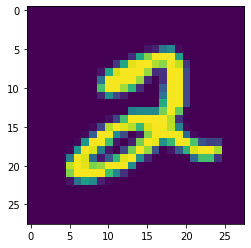

Mean layer activation map of class 0: 


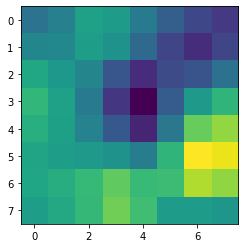

Combined image, with predicted class 2: 


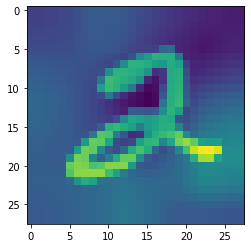

********************************************************************************
Adversarial experiment using PaperCNN on fashion_mnist...
********************************************************************************
Original image for reference class 2, with predicted class 2: 


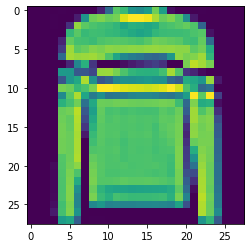

Mean layer activation map of class 0: 


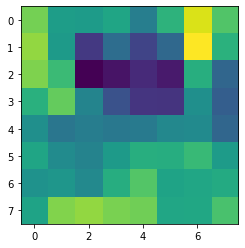

Combined image, with predicted class 2: 


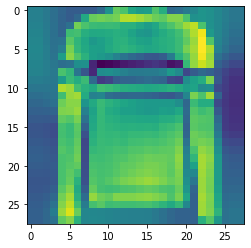

********************************************************************************
Adversarial experiment using Alexish on mnist...
********************************************************************************
Original image for reference class 2, with predicted class 2: 


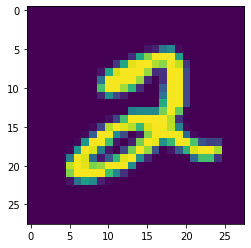

Mean layer activation map of class 0: 


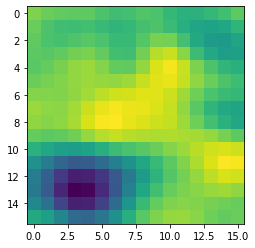

Combined image, with predicted class 2: 


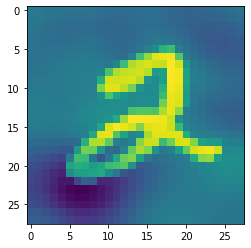

********************************************************************************
Adversarial experiment using Alexish on fashion_mnist...
********************************************************************************
Original image for reference class 2, with predicted class 2: 


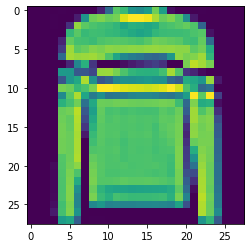

Mean layer activation map of class 0: 


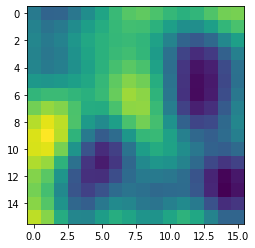

Combined image, with predicted class 2: 


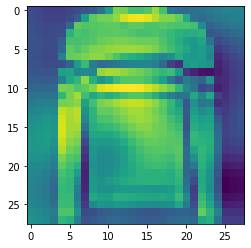

In [10]:
ref_class = 2
bias_class = 0

for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:
        AdversarialMain(ckpt_path, model_name, dataset_name, ref_class, bias_class, model_noise_act_maps, "Last Conv")

As we can see from the above results, even after adding the mean layer activation map to the original image, the classifier is still able to correctly classify the image. This may be due to a few reasons: 

1. The two datasets we use, MNIST and FashionMNIST, are too "easy". The models generalize well on them, so introducing noise to the images, even if the noise contains misleading information, does not affect the models' performance. This may be why the paper performs this experiment on CIFAR-10, a more complicated dataset where models have more variance.

2. Seen below, if we pass just the mean layer activation map for each class through the model, we see that the model does not actually classify them to the same class. Again, this seems to be a consequence of the datasets used. Since the activation maps themselves are unable to bias the models, then adding them to another image won't likely bias the model either.  

In [11]:
import cv2 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def predict(model, img):
    output = model(img)
    pred = torch.argmax(output)
    return pred

def normalize(data):
    data -= data.min().item()
    data /= data.max().item()
    return data

In [12]:
'''MNIST'''

print("*" * 80)
print(f"MNIST")
print("*" * 80)

# Load model
model = utils.load_model("PaperCNN", "mnist", ckpt_path)
model = model.to(device)
model.eval()

# Classify noise maps 
for cls in range(10):
    noise_map = model_noise_act_maps["PaperCNN"+"mnist"]["Last Conv"][cls]
    noise_map_up = cv2.resize(noise_map.cpu().numpy(), (28, 28))
    
    pred = predict(model, torch.from_numpy(normalize(noise_map_up)).view(1, 1, 28, 28).to(device))
    print(f"Class {cls}'s activation map was classified as class {pred}")
    

'''FashionMNIST'''

print("*" * 80)
print(f"Fashion MNIST")
print("*" * 80)

# Load model 
model = utils.load_model("PaperCNN", "fashion_mnist", ckpt_path)
model = model.to(device)
model.eval()

# Classify noise maps 
for cls in range(10):
    noise_map = model_noise_act_maps["PaperCNN"+"fashion_mnist"]["Last Conv"][cls]
    noise_map_up = cv2.resize(noise_map.cpu().numpy(), (28, 28))
    
    pred = predict(model, torch.from_numpy(normalize(noise_map_up)).view(1, 1, 28, 28).to(device))
    print(f"Class {cls}'s activation map was classified as class {pred}")



********************************************************************************
MNIST
********************************************************************************
Class 0's activation map was classified as class 0
Class 1's activation map was classified as class 8
Class 2's activation map was classified as class 1
Class 3's activation map was classified as class 3
Class 4's activation map was classified as class 1
Class 5's activation map was classified as class 5
Class 6's activation map was classified as class 6
Class 7's activation map was classified as class 7
Class 8's activation map was classified as class 1
Class 9's activation map was classified as class 9
********************************************************************************
Fashion MNIST
********************************************************************************
Class 0's activation map was classified as class 2
Class 1's activation map was classified as class 8
Class 2's activation map was classified as c

## Bonus: Actual Spike Triggered Analysis (spike triggered averaging)

In [5]:
from spike_triggered_analysis import STA_main

We will now compute spike triggered averaging for the first two conv layers of all models. STA is essentially the mean receptive field of each conv filter weighted by its corresponding activation value. Let's begin by computing on noise data. This is what's visualized in Figure 8 of the paper.

********************************************************************************
Calculating spike triggered averaging for mnist PaperCNN using noise data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (12, 12),  is [(12.0, 17.0), (12.0, 17.0)]


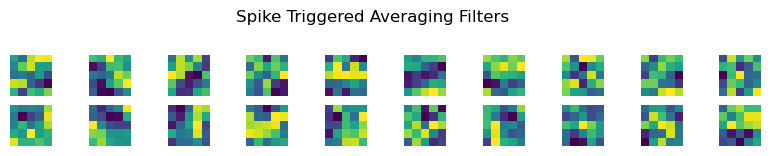

Second Conv
Receptive field size for layer 3, unit_position (4, 4),  is [(8.0, 22.0), (8.0, 22.0)]


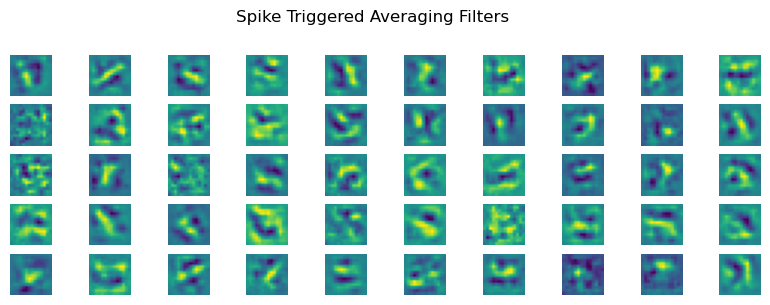

********************************************************************************
Calculating spike triggered averaging for fashion_mnist PaperCNN using noise data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (12, 12),  is [(12.0, 17.0), (12.0, 17.0)]


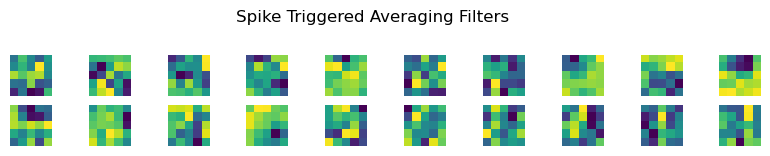

Second Conv
Receptive field size for layer 3, unit_position (4, 4),  is [(8.0, 22.0), (8.0, 22.0)]


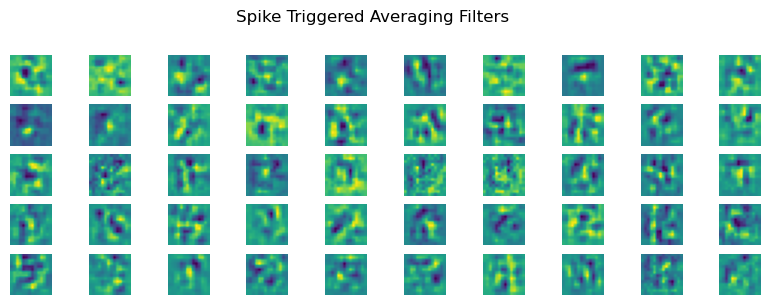

********************************************************************************
Calculating spike triggered averaging for mnist Alexish using noise data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (13, 13),  is [(13.0, 16.0), (13.0, 16.0)]


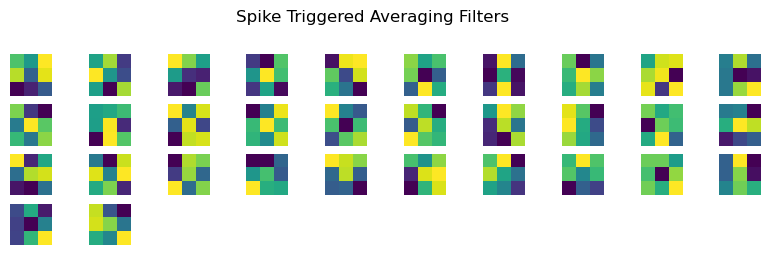

Second Conv
Receptive field size for layer 3, unit_position (11, 11),  is [(11.0, 18.0), (11.0, 18.0)]


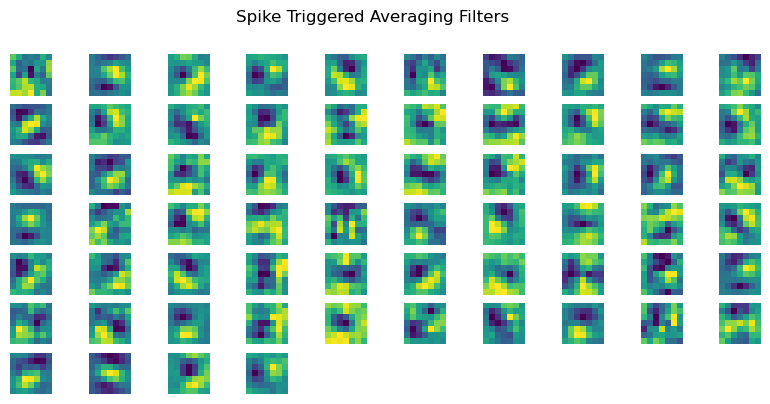

********************************************************************************
Calculating spike triggered averaging for fashion_mnist Alexish using noise data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (13, 13),  is [(13.0, 16.0), (13.0, 16.0)]


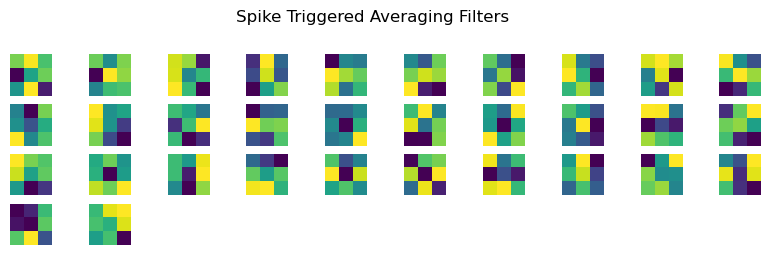

Second Conv
Receptive field size for layer 3, unit_position (11, 11),  is [(11.0, 18.0), (11.0, 18.0)]


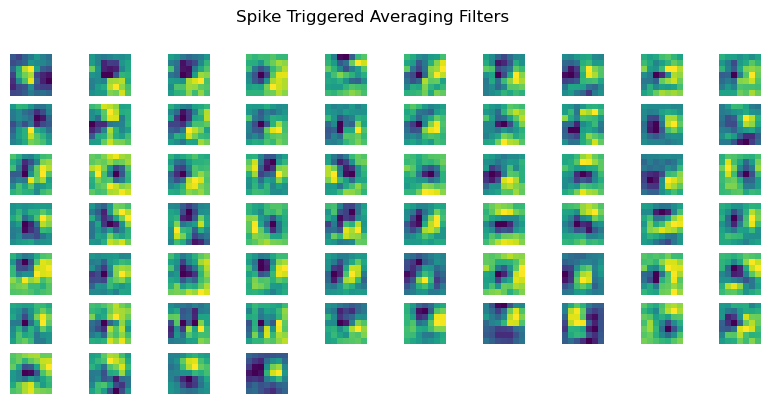

In [6]:
outdir = './'
ckpt_path = os.path.join(outdir, 'model_ckpts') 

# Spike triggered averaging 
for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:

        STA_main(ckpt_path, model_name, dataset_name, num_trials=300000, real_data=False)

Now let's do the same but on real data. 

********************************************************************************
Calculating spike triggered averaging for mnist PaperCNN using real data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (12, 12),  is [(12.0, 17.0), (12.0, 17.0)]


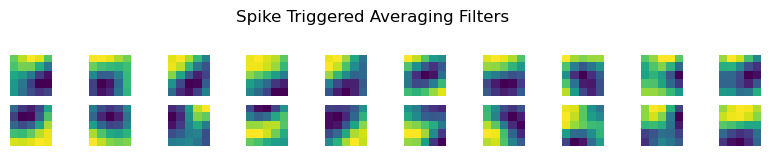

Second Conv
Receptive field size for layer 3, unit_position (4, 4),  is [(8.0, 22.0), (8.0, 22.0)]


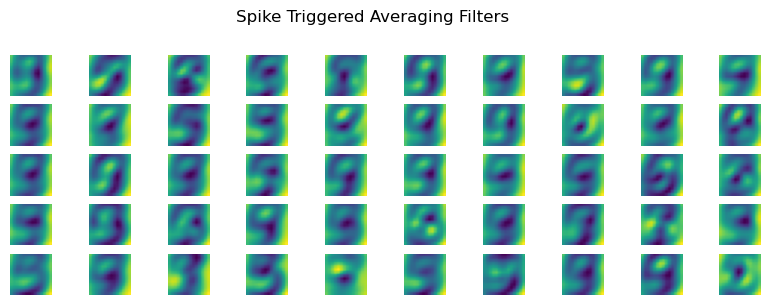

********************************************************************************
Calculating spike triggered averaging for fashion_mnist PaperCNN using real data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (12, 12),  is [(12.0, 17.0), (12.0, 17.0)]


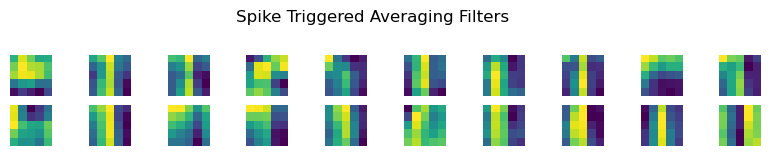

Second Conv
Receptive field size for layer 3, unit_position (4, 4),  is [(8.0, 22.0), (8.0, 22.0)]


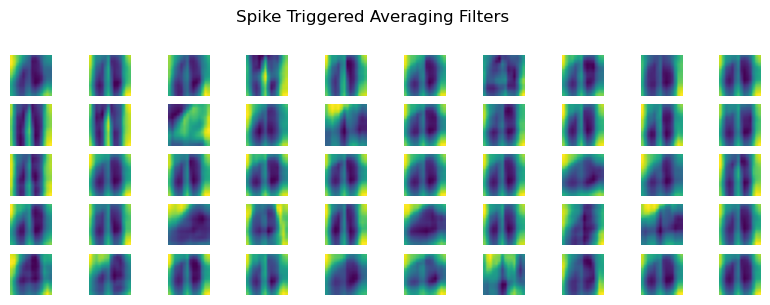

********************************************************************************
Calculating spike triggered averaging for mnist Alexish using real data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (13, 13),  is [(13.0, 16.0), (13.0, 16.0)]


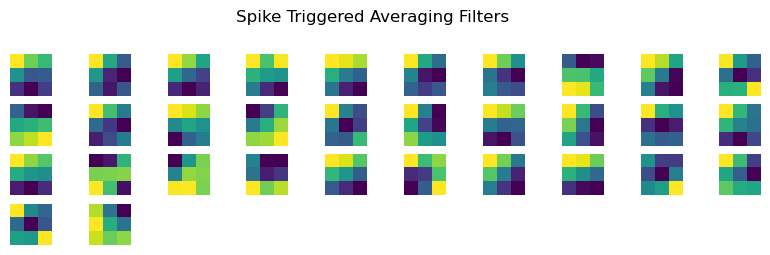

Second Conv
Receptive field size for layer 3, unit_position (11, 11),  is [(11.0, 18.0), (11.0, 18.0)]


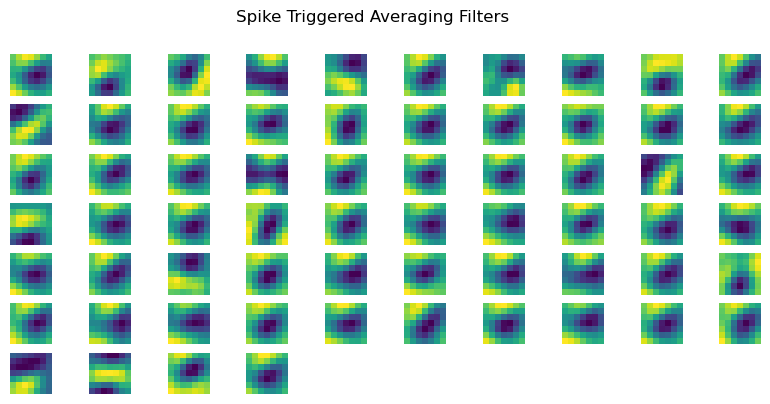

********************************************************************************
Calculating spike triggered averaging for fashion_mnist Alexish using real data
********************************************************************************
First Conv
Receptive field size for layer 1, unit_position (13, 13),  is [(13.0, 16.0), (13.0, 16.0)]


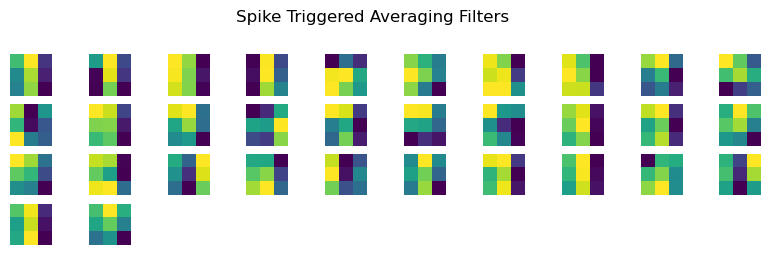

Second Conv
Receptive field size for layer 3, unit_position (11, 11),  is [(11.0, 18.0), (11.0, 18.0)]


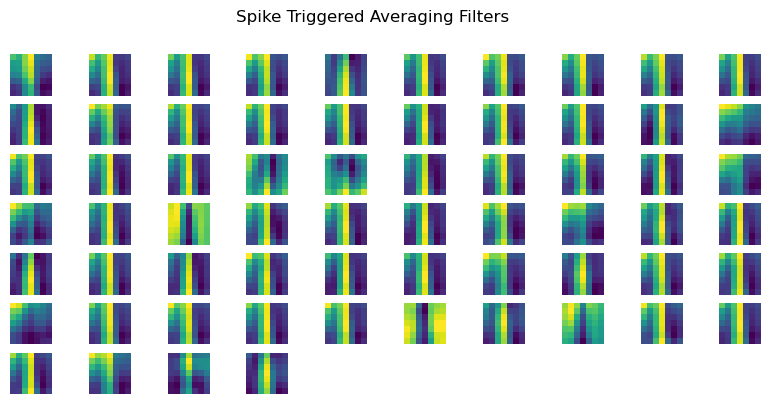

In [8]:
# Spike triggered averaging 
for model_name in ["PaperCNN", "Alexish"]:
    for dataset_name in ["mnist", "fashion_mnist"]:

        STA_main(ckpt_path, model_name, dataset_name, num_trials=300000, real_data=True)